In [9]:
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [21]:
# create an instance of ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,  # randomly rotate images by 10 degrees
    width_shift_range=0.1,  # randomly shift images horizontally by 10%
    height_shift_range=0.1,  # randomly shift images vertically by 10%
    zoom_range=0.1,  # randomly zoom images by up to 10%
    fill_mode='nearest',  # fill in missing pixels with nearest value
    )

# generate augmented images from MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape images to (samples, height, width, channels) format
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print(X_train.shape)
# fit the ImageDataGenerator to the training data
datagen.fit(X_train)

X_train = datagen.flow(X_train, batch_size=60000,shuffle=False).next().reshape(X_train.shape[0], 28, 28,)


(60000, 28, 28, 1)


In [12]:
print(X_train.shape, train_X.shape)

(60000, 28, 28) (60000, 28, 28)


<Figure size 432x288 with 0 Axes>

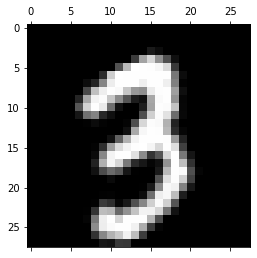

<Figure size 432x288 with 0 Axes>

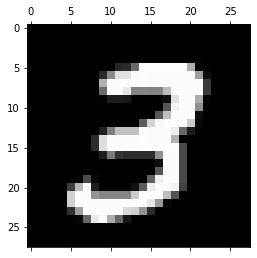

In [25]:
X_train.shape
i = np.random.randint(0,100)
# augmented data
plt.gray()
plt.matshow(X_train[i])
plt.show()

# default data
plt.gray()
plt.matshow(train_X[i])
plt.show()

In [14]:
np.append(train_X, X_train, axis = 0).shape

(120000, 28, 28)

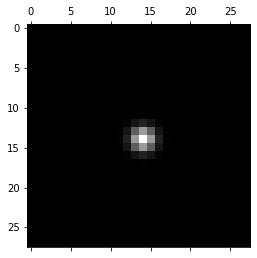

In [37]:
import numpy as np

# 28x28 matrix initialization
matrix_size = 28
matrix = np.zeros((matrix_size, matrix_size))

# Gaussian distribution parameters
sigma = 1
amplitude = 1

def apply_gaussian(matrix, x, y, sigma, amplitude):
    """Modify the matrix based on a Gaussian distribution centered at (x,y)"""
    for i in range(matrix_size):
        for j in range(matrix_size):
            dist = np.sqrt((x - i)**2 + (y - j)**2)
            # calculate the modification factor using the Gaussian formula
            factor = np.exp(-dist**2 / (2 * sigma**2)) * amplitude
            # apply the modification factor to the pixel value
            matrix[i, j] += factor
            # keep the pixel value between 0 and 1
            matrix[i, j] = np.clip(matrix[i, j], 0, 1)
            
# example usage
mouse_x, mouse_y = 14, 14  # assume mouse position is at the center of the matrix
apply_gaussian(matrix, mouse_x, mouse_y, sigma, amplitude)

apply_gaussian(matrix, mouse_x, mouse_y, sigma, -amplitude)

plt.matshow(matrix)

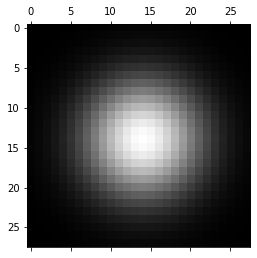